# **Uber Supply-Demand Gap Analysis**

**Project type**

In [ ]:
EDA (Exploratory Data Analysis)

 **Contribution**

In [ ]:
Individual

**Team member**

In [ ]:
Nida Fathima


Goal: Analyze Uber ride request data to identify demand-supply gaps, cancellation patterns, and service bottlenecks.****

**Step 1: Load Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/sample_data/Uber Request Data cleaned.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of Request,Time slot
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51 AM,11-07-2016 01:00 PM,11,Day
1,867,Airport,1.0,Trip Completed,11-07-2016 05:57 PM,11-07-2016 06:47 PM,17,Day
2,1807,City,1.0,Trip Completed,12-07-2016 09:17 AM,12-07-2016 09:58 AM,9,Day
3,2532,Airport,1.0,Trip Completed,12-07-2016 09:08 PM,12-07-2016 10:03 PM,21,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33 AM,13-07-2016 09:25 AM,8,Day


**Step 2: Data Overview**

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Hour of Request    6745 non-null   int64  
 7   Time slot          6745 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 421.7+ KB


**Step 3: Extracting NAN values**

In [ ]:
#Checking Null values
df.isnull().sum()
# we can ingore null values in Drivers id and Drop timestamp beacuse drivers id is not availbale for the cancelled trip and DRop timestamp we can ingore it is not important

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914
Hour of Request,0
Time slot,0


**Step 4: Ride Status Distribution**

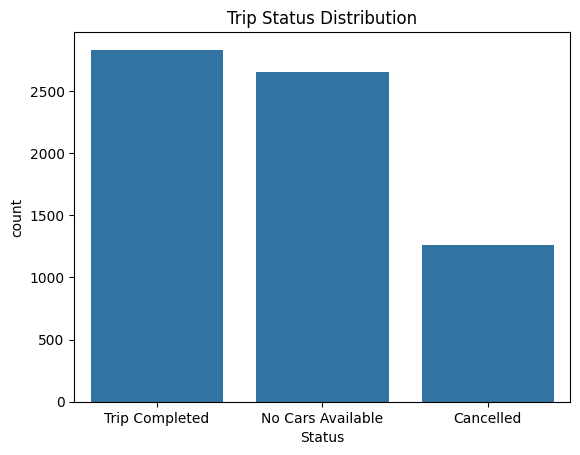

In [ ]:
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Trip Status Distribution')
plt.show()
# Explanation: This shows the number of trips that were Completed, Cancelled, or faced No Cars Available issues.

**Step 5: Trip status by time slot**

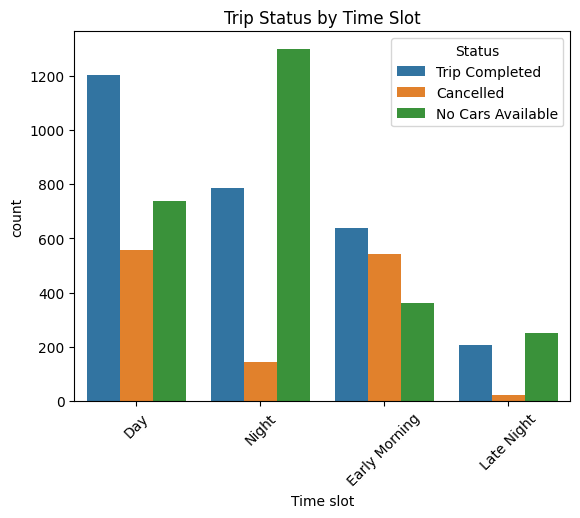

In [ ]:
sns.countplot(data=df, x='Time slot', hue='Status')
plt.title('Trip Status by Time Slot')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pd.crosstab(df['Time slot'], df['Status'])

Status,Cancelled,No Cars Available,Trip Completed
Time slot,,,
Day,556,739,1201
Early Morning,543,363,638
Late Night,22,250,205
Night,143,1298,787


The Night time slot (18:00 – 23:00) has the highest number of failed requests, primarily due to unavailability — a critical concern.

Early Morning also shows a high failure rate, mostly from cancellations — indicating reluctance from drivers to accept rides during that time

Day is active but still suffers from unmet demand.

Late Night suffers from a low supply of drivers rather than user demand or cancellations.


**Step 6: Status by Pickup Point**

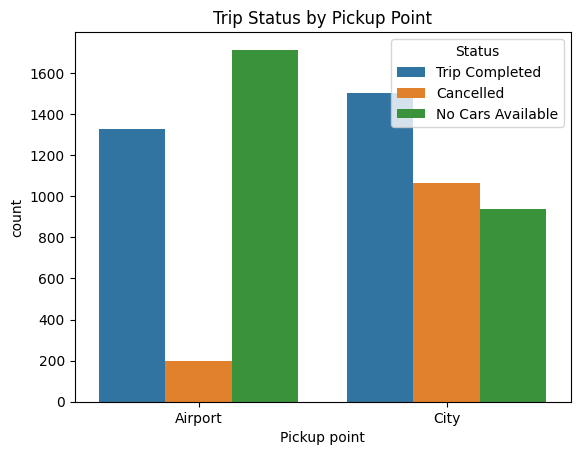

In [ ]:
sns.countplot(data=df, x='Pickup point', hue='Status')
plt.title('Trip Status by Pickup Point')
plt.show()

In [ ]:
pd.crosstab(df['Pickup point'], df['Status'])

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


**Observation**

At the Airport, the major issue is unavailability of cabs, with over 50% of the requests ending in No Cars Available.

At the City, the major issue is cancellations by drivers, with 30.4% of the requests being Cancelled after booking.

Although the completion rates are nearly the same at both locations (~41–43%), the reasons for failure differ significantly:

**Step 7: Hourly Demand**

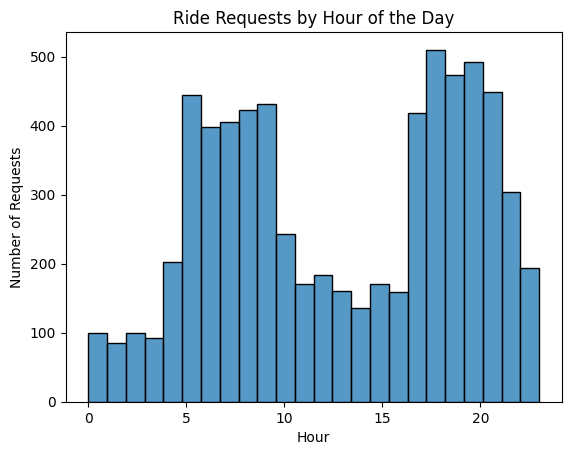

In [ ]:
sns.histplot(df['Hour of Request'], bins=24, kde=False)
plt.title('Ride Requests by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.show()

**Observation**
An analysis of hourly ride requests shows clear demand peaks during two specific periods of the day:

Morning Peak: Between 05:00 and 09:00, the number of ride requests consistently ranges between 400 and 550 per hour.

Evening Peak: A second surge is observed from 17:00 to 21:00, again with high request volumes in the range of 400 to 550 per hour.

**Step 8- Save EDA output**

In [ ]:
df.to_csv('uber_eda_output.csv', index=False)